In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random 
import kaggle
import zipfile

In [2]:
#we downloaded the data from kaggle 
kaggle_dataset = 'purumalgi/music-genre-classification'  # Example: 'zillow/zecon'
file_name = 'music-genre-classification'  # Name of the file you want to download
data_folder = '../data'

# Create data directory if it does not exist
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
if not os.path.exists(os.path.join(data_folder, file_name)):
    try:
        # Download the dataset file from Kaggle
        kaggle.api.dataset_download_files(dataset=kaggle_dataset, unzip =True, path=data_folder)
        print('Data downloaded and extracted.')

    except Exception as e:
        print(f"An error occurred: {e}")

Dataset URL: https://www.kaggle.com/datasets/purumalgi/music-genre-classification
Data downloaded and extracted.


In [3]:
df1 = pd.read_csv(os.path.join(data_folder,'train.csv'))
df2 = pd.read_csv(os.path.join(data_folder,'test.csv'))
print('First Dataset')
display(df1.head())
print('Second Dataset')
display(df2.head())

First Dataset


Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

Second Dataset


Artist Name                                Track Name  Popularity  \
0      David Bowie              Space Oddity - 2015 Remaster        73.0   
1      Crimson Sun                       Essence of Creation        34.0   
2             P!nk                          Raise Your Glass        78.0   
3     Shawn Mendes                                    Wonder        80.0   
4  Backstreet Boys  Helpless When She Smiles - Radio Version        48.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.310   0.403   NaN   -13.664     1       0.0326       0.07260   
1         0.511   0.955   1.0    -5.059     1       0.1290       0.00040   
2         0.700   0.709   7.0    -5.006     1       0.0839       0.00480   
3         0.333   0.637   1.0    -4.904     0       0.0581       0.13100   
4         0.393   0.849  11.0    -4.114     1       0.0459       0.00421   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0          0.000093    0.1390    0.466  134.480       318027.000000   
1          0.000009    0.2630    0.291  151.937       220413.000000   
2               NaN    0.0289    0.625  122.019       202960.000000   
3          0.000018    0.1490    0.132  139.898       172693.000000   
4               NaN    0.1620    0.222   74.028            4.093117   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [4]:
musics = pd.concat([df1,df2], join='inner', ignore_index= True)

In [5]:
musics.isna().sum()

Artist Name              0
Track Name               0
Popularity             655
danceability             0
energy                   0
key                   2822
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      6286
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64

In [6]:
musics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25709 entries, 0 to 25708
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         25709 non-null  object 
 1   Track Name          25709 non-null  object 
 2   Popularity          25054 non-null  float64
 3   danceability        25709 non-null  float64
 4   energy              25709 non-null  float64
 5   key                 22887 non-null  float64
 6   loudness            25709 non-null  float64
 7   mode                25709 non-null  int64  
 8   speechiness         25709 non-null  float64
 9   acousticness        25709 non-null  float64
 10  instrumentalness    19423 non-null  float64
 11  liveness            25709 non-null  float64
 12  valence             25709 non-null  float64
 13  tempo               25709 non-null  float64
 14  duration_in min/ms  25709 non-null  float64
 15  time_signature      25709 non-null  int64  
dtypes: f

In [7]:
musics.nunique()

Artist Name           11304
Track Name            20303
Popularity              100
danceability            939
energy                 1297
key                      11
loudness              10610
mode                      2
speechiness            1220
acousticness           4227
instrumentalness       4633
liveness               1528
valence                1397
tempo                 17578
duration_in min/ms    18562
time_signature            5
dtype: int64

#Exploratory Data Analysis (EDA)

In [8]:
musics.sort_values(by='Popularity', ascending=False)

Artist Name                              Track Name  Popularity  \
13489           Måneskin                                 Beggin'       100.0   
11781          Lil Nas X          MONTERO (Call Me By Your Name)       100.0   
24058          Lil Nas X          MONTERO (Call Me By Your Name)       100.0   
187       Olivia Rodrigo                                good 4 u        99.0   
21793      Justin Bieber  Peaches (feat. Daniel Caesar & Giveon)        99.0   
...                  ...                                     ...         ...   
25515     Britney Spears                   Mood Ring (By Demand)         NaN   
25556   The Replacements                            Alex Chilton         NaN   
25595          Your Body                                   Mipso         NaN   
25635  The Electric Flag                             Losing Game         NaN   
25696              Au/Ra              Concrete Jungle - Acoustic         NaN   

       danceability  energy   key  loudness  mode  speechiness  acousticness  \
13489         0.714   0.800  11.0    -4.808     0       0.0504       0.12700   
11781         0.610   0.508   8.0    -6.682     0       0.1520       0.29700   
24058         0.610   0.508   8.0    -6.682     0       0.1520       0.29700   
187           0.563   0.664   9.0    -5.044     1       0.1540       0.33500   
21793         0.677   0.696   NaN    -6.181     1       0.1190       0.32100   
...             ...     ...   ...       ...   ...          ...           ...   
25515         0.519   0.450   8.0    -9.128     0       0.0688       0.21000   
25556         0.421   0.961   6.0    -4.876     0       0.0537       0.00368   
25595         0.762   0.472   3.0    -9.271     1       0.0345       0.72500   
25635         0.488   0.695   NaN   -11.048     1       0.0383       0.00568   
25696         0.589   0.467   6.0    -8.179     1       0.0310       0.76100   

       instrumentalness  liveness  valence    tempo  duration_in min/ms  \
13489               NaN    0.3590    0.589  134.002            3.526000   
11781               NaN    0.3840    0.758  178.818       137876.000000   
24058               NaN    0.3840    0.758  178.818       137876.000000   
187                 NaN    0.0849    0.688  166.928            2.969117   
21793               NaN    0.4200    0.464   90.030       198082.000000   
...                 ...       ...      ...      ...                 ...   
25515               NaN    0.1880    0.309  104.817            3.825117   
25556          0.000011    0.3200    0.762  165.517       193133.000000   
25595          0.002140    0.0737    0.338   96.201            3.405550   
25635          0.006580    0.0253    0.811  145.996       198158.000000   
25696               NaN    0.0847    0.571  165.908            2.672417   

       time_signature  
13489               4  
11781               4  
24058               4  
187                 4  
21793               4  
...               ...  
25515               4  
25556               4  
25595               4  
25635               4  
25696               4  

[25709 rows x 16 columns]

In [9]:
import seaborn as sns
sns.pairplot(musics)

ModuleNotFoundError: No module named 'seaborn'

In [10]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


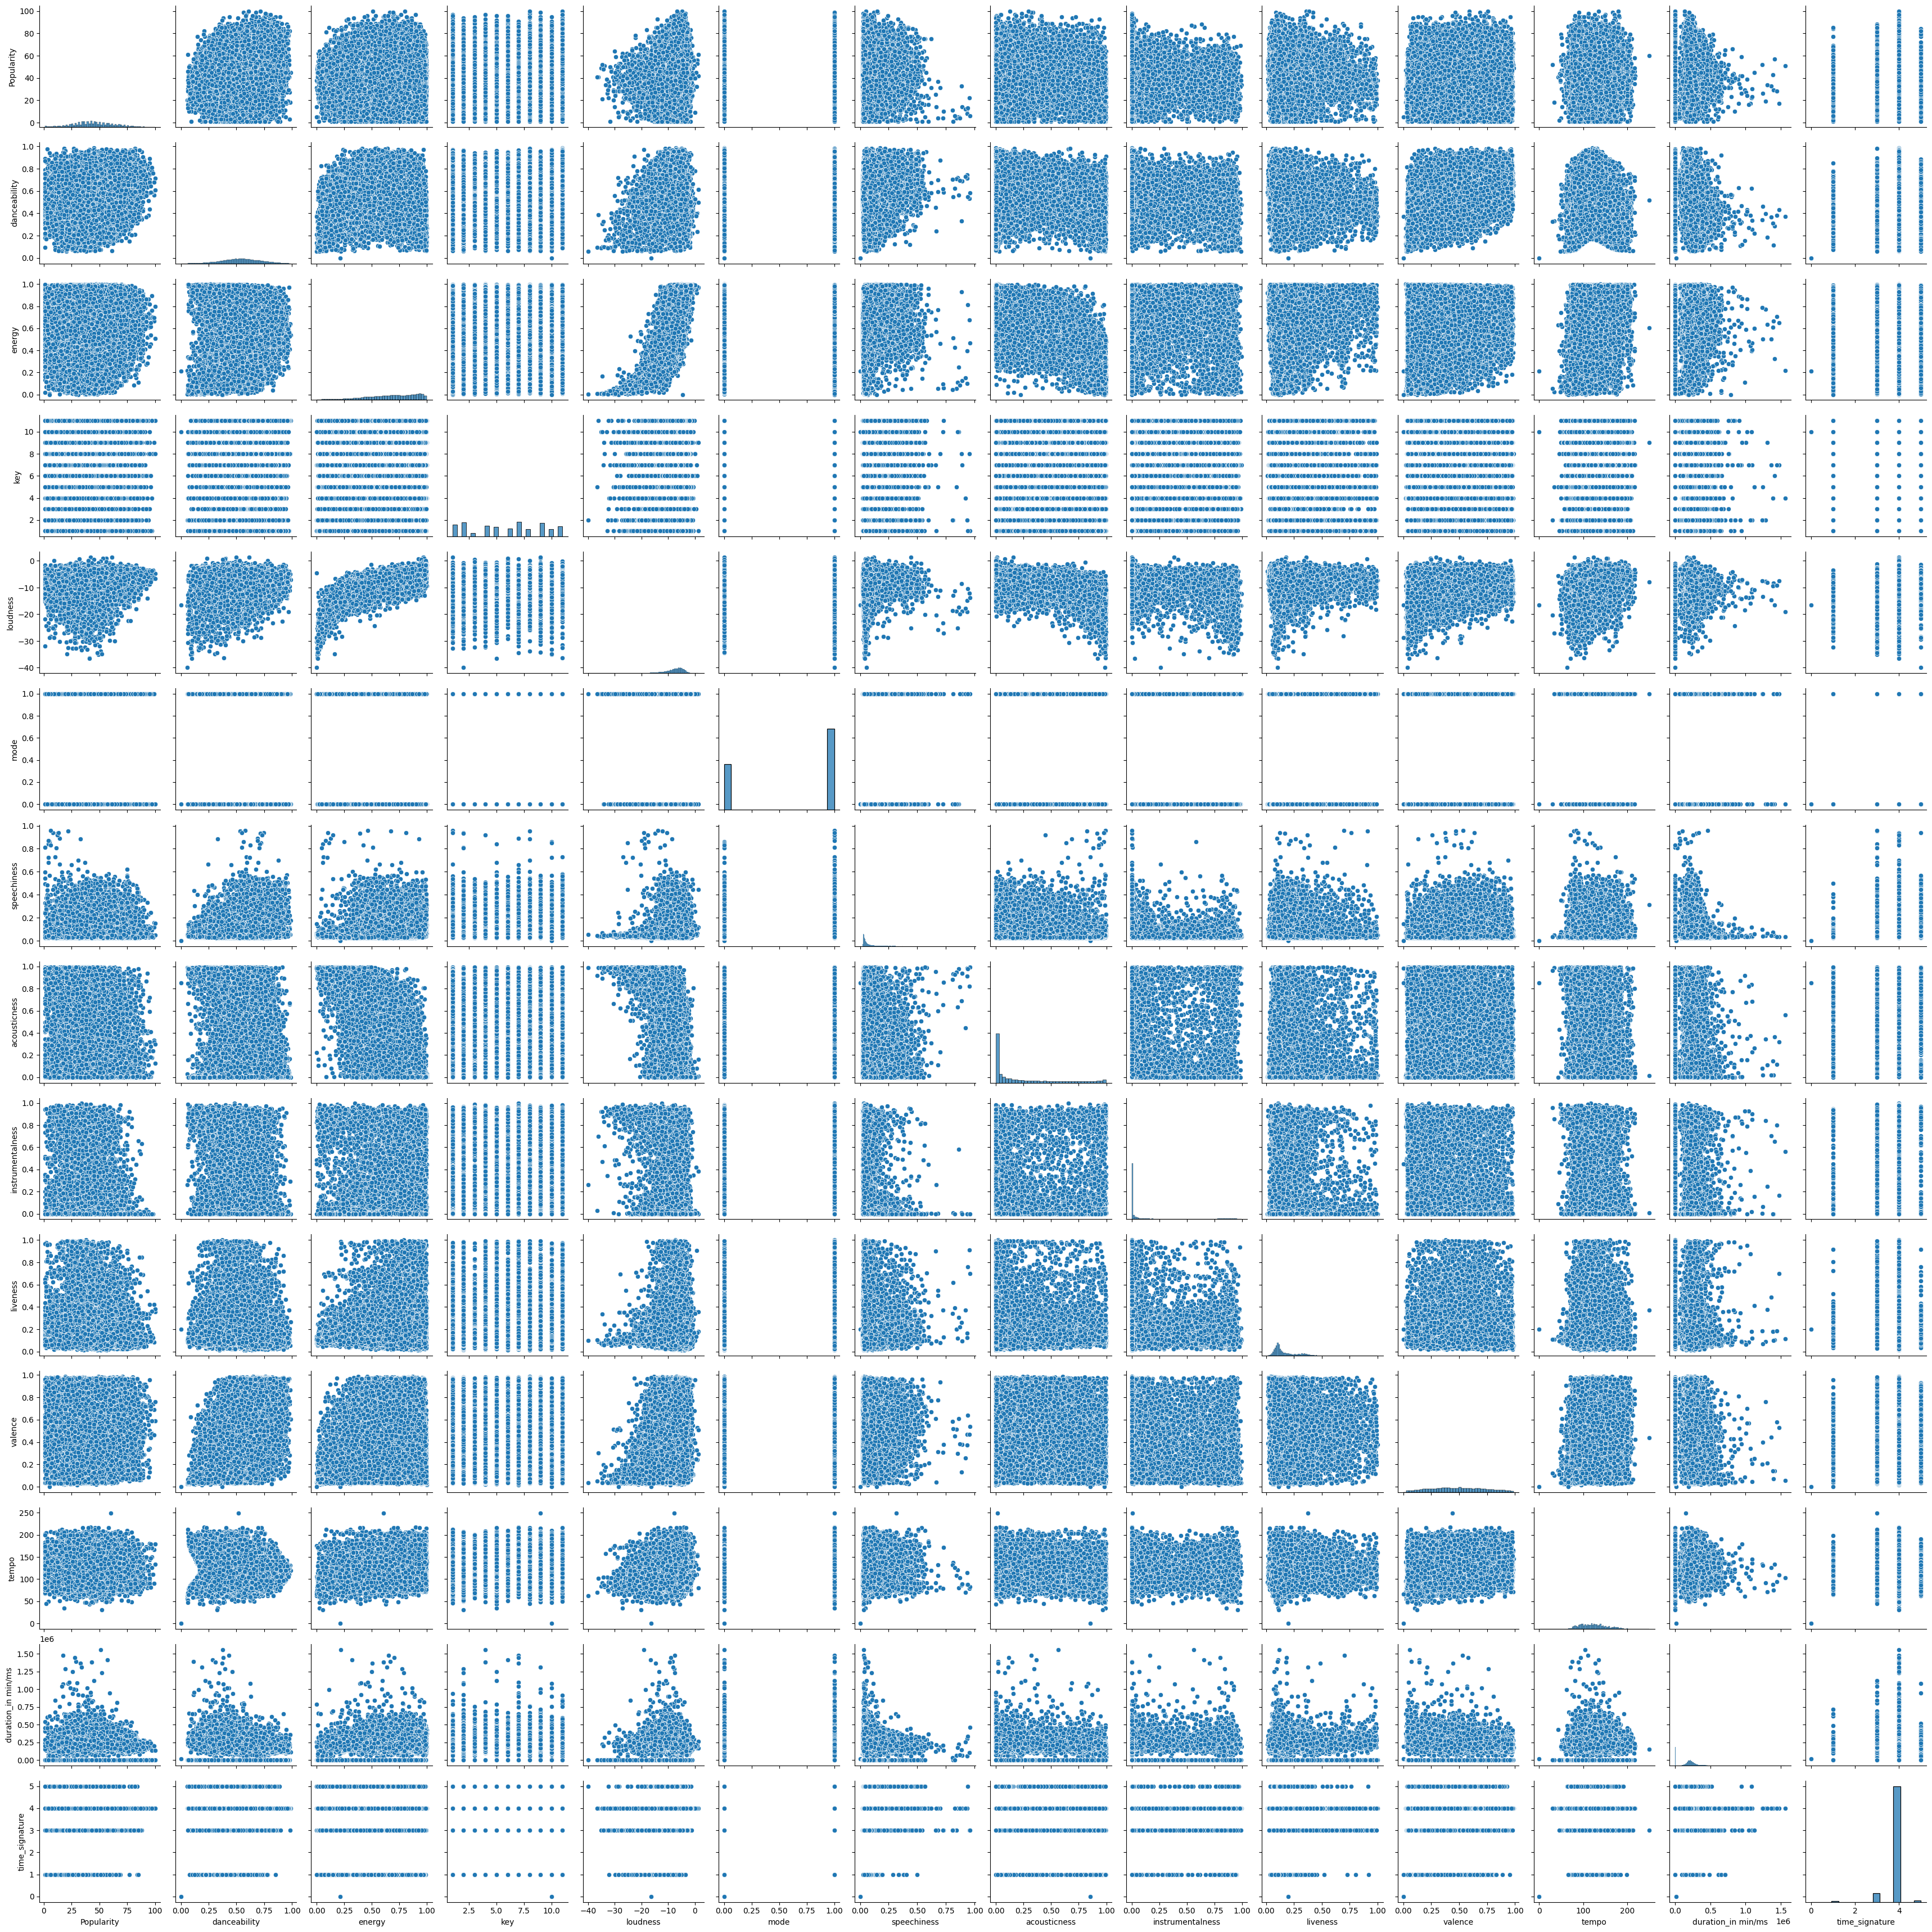

In [11]:
import seaborn as sns
sns.pairplot(musics)

Lets look at the correlation between these features

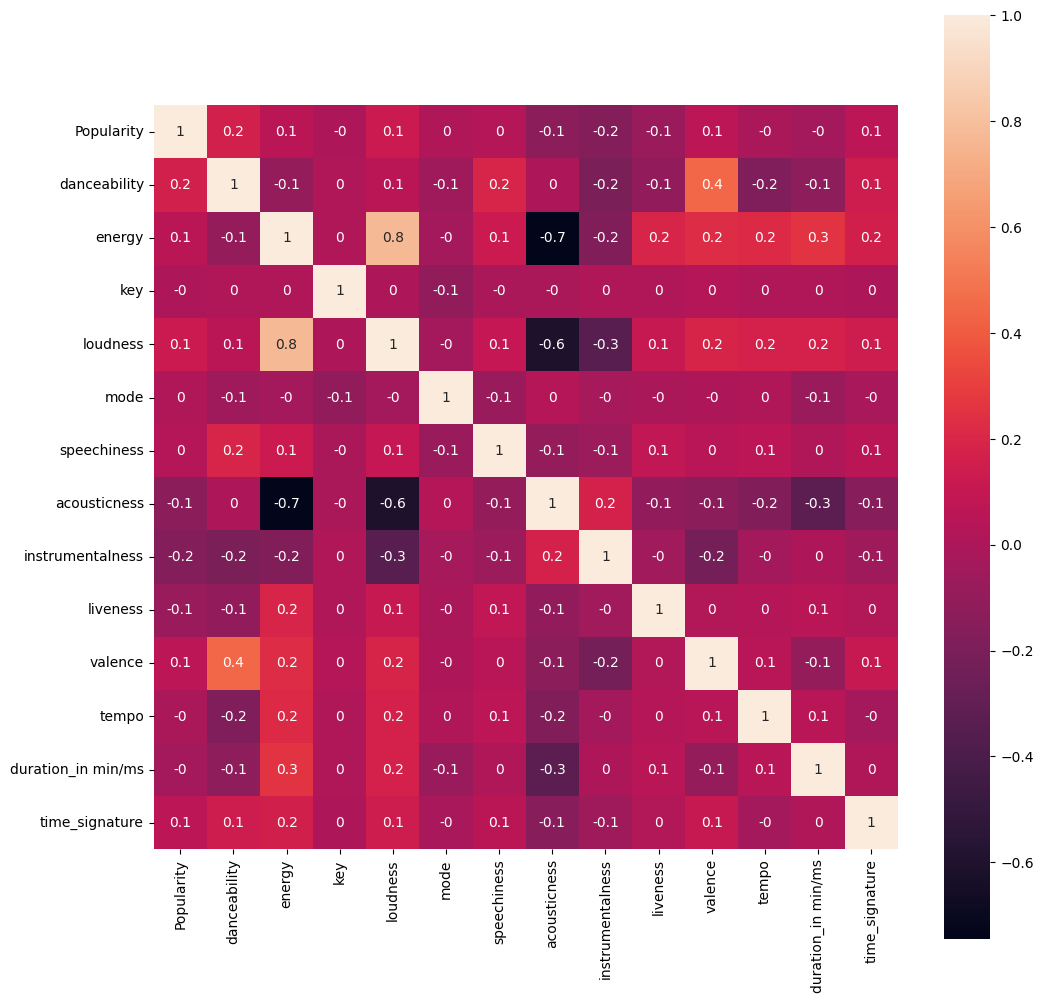

In [12]:
correlation = musics.corr(numeric_only=True)
plt.figure(figsize = (12,12))
sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            annot=round(correlation,1),
            square=True)
plt.show()

Lets use PCA for dimension reduction. Things to consider before.

-Only Numerical values can be scaled

-Data shouldn't have null values of inf

In [13]:
processed = musics.iloc[:,2:]
processed

Popularity  danceability  energy   key  loudness  mode  speechiness  \
0            60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1            54.0         0.382   0.814   3.0    -7.230     1       0.0406   
2            35.0         0.434   0.614   6.0    -8.334     1       0.0525   
3            66.0         0.853   0.597  10.0    -6.528     0       0.0555   
4            53.0         0.167   0.975   2.0    -4.279     1       0.2160   
...           ...           ...     ...   ...       ...   ...          ...   
25704        28.0         0.816   0.927   7.0    -1.581     1       0.0600   
25705        45.0         0.429   0.599   7.0    -7.236     0       0.0363   
25706        38.0         0.805   0.905   6.0    -7.222     0       0.2750   
25707        51.0         0.801   0.930   9.0    -7.365     1       0.0354   
25708        45.0         0.630   0.867  10.0    -4.393     0       0.3150   

       acousticness  instrumentalness  liveness  valence    tempo  \
0          0.017100               NaN    0.0849   0.8990  134.071   
1          0.001100          0.004010    0.1010   0.5690  116.454   
2          0.486000          0.000196    0.3940   0.7870  147.681   
3          0.021200               NaN    0.1220   0.5690  107.033   
4          0.000169          0.016100    0.1720   0.0918  199.060   
...             ...               ...       ...      ...      ...   
25704      0.264000               NaN    0.0735   0.6430  128.019   
25705      0.025400          0.009330    0.3620   0.2570  127.446   
25706      0.159000          0.000011    0.0590   0.6910  135.224   
25707      0.080600          0.152000    0.0558   0.9670  133.255   
25708      0.169000               NaN    0.0975   0.5570  156.017   

       duration_in min/ms  time_signature  
0            234596.00000               4  
1            251733.00000               4  
2            109667.00000               4  
3            173968.00000               4  
4            229960.00000               4  
...                   ...             ...  
25704        231680.00000               4  
25705        367879.00000               4  
25706             2.45355               4  
25707        221320.00000               4  
25708        199922.00000               4  

[25709 rows x 14 columns]

In [14]:
#Since we have a lot of data and they are somewhat corerelated we are going to use KNN imputer to fill the null values.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors = 5)
imputed = imputer.fit_transform(processed)

In [15]:
processed = pd.DataFrame(imputed,columns=processed.columns) # imputer gives out nd array so converting it back to df
processed.isna().sum()

Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
dtype: int64